In [7]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

In [8]:
# Loading the dataset
data = pd.read_csv('winequality/winequality-red.csv', sep=";")

In [9]:
# Checking the top rows of data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Checking of null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Taking all the columns except quality as input variables
X = data.iloc[:, :-1]

In [12]:
# normalising the values of columns
for col in X.columns:
    X[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())

In [13]:
# quality is the target variable
y = data.quality.values

In [14]:
# Adding bias term
X['bias'] = 1

In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1


In [16]:
# Intializing weights with zero
weights = np.zeros((X.shape[1], 1))

In [17]:
# defining learning rate and number of epcohs
learning_rate = 1e-3
n_epochs = 10000

In [18]:
# mean squarred error
def mse(y, yhat):
    return np.mean((y - yhat) ** 2)

In [19]:
# r^2 
def r2_score(y, yhat):
    rss = (y - yhat) ** 2
    tss = (y - y.mean()) ** 2
    return 1 - rss / tss

In [20]:
m = len(X)

In [21]:
y = np.array(data.quality.values).reshape(1599, 1)

In [22]:
# loss = (y - yhat) ** 2 / 2
#loss = 1 / 2 * (y - WX) ** 2
# dwi = -(y - yhat) * xi

In [23]:
loss = []
for epoch in range(n_epochs):
    yhat = np.dot(X, weights)
    yhat = yhat.reshape(1599, 1)
    error = yhat - y
    dw = np.dot(error.T, X.iloc[:, :-1])
    weights[:-1] -= learning_rate * dw.T / m
    weights[-1] -= learning_rate * error.mean()
    loss.append(mse(y, yhat))

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

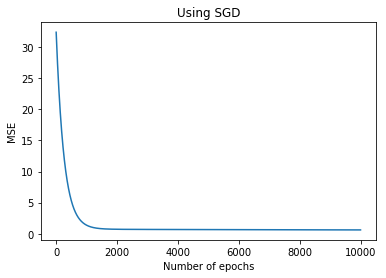

In [25]:
plt.plot(loss)
plt.title('Using SGD')
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.show()